# Data Analyze

## skills
- jupyter( python 3.5)
- matplotlib
- numpy
- pandas
- sklearn

## DataSet
dataset/housing.csv (california , USA)<br/>
class label : median_house_value (집값의 중간값,median)<br/>
features : 아래 pandas 참조

## Purpose
- 아래 데이터를 통하여 Numeric type인 class label을 예측하는 경우이므로 regression model을 사용하도록 한다.
- 각 feature들이 median_house_value에 영향을 주는 정도를 Model에 학습시키고 unknown data에 대해 median_house_value를 예측한다.

In [1]:
import pandas as pd
housing = pd.read_csv('dataset/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Features
- 8개의 Numeric type
- 1개의 Categorical type

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Dataset의 크기는 20640개
- total_bedrooms : 20433개 인것으로 Missing Data(NaN)이 존재함을 확인 할 수 있음.

In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 데이터의 이해
- Machine Learning을 적용하기에 앞서 높은 performance를 위해 데이터 전처리(data preprocessing)을 수행해야하고 데이터 전처리를 위해서는 먼저 데이터를 이해할 필요가 있다.
- Pandas 라이브러리는 describe method를 통해 데이터의 평균값,중앙값,qualtile,표준편차 정보를 손쉽게 알 수 있다.
- 위 데이터를 수치로 보는것 뿐만아니라 matplotlib를 통해 데이터를 시각화하여 insight를 얻을 수 있다.

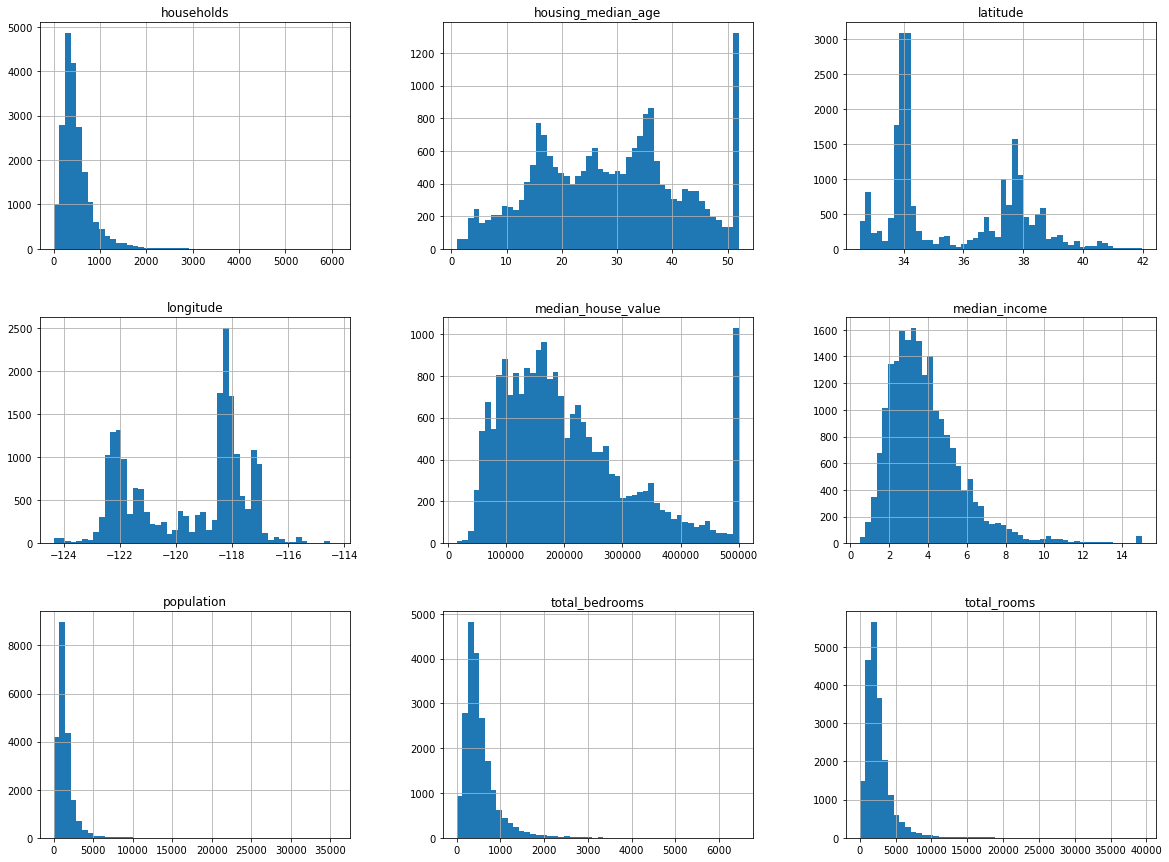

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Accuracy 측정방법
- Holdout
- Random-Subsampling
- k-fold cross validation
- boostrap

In [5]:
import numpy as np

#holdout
def split_train_test(data,test_ratio):
    '''
    data : pandas.DataFrame
    test_ratio : 전체 데이터셋중 test_set이 차지하는 비율
    '''
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio) # testset data의 갯수.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set, test_set = split_train_test(housing,0.2)
print('training dataset의 크기 : ',len(train_set),'\ntest dataset의 크기 :',len(test_set))

training dataset의 크기 :  16512 
test dataset의 크기 : 4128


## Skcit-learn library
Machine Learning Application에 유용한 여러가지 메소드를 제공하는 파이썬 라이브러리.
위에서 만든 custom holdout을 다음과 같은 함수로 제공한다.

In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [7]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


## training dataset, test dataset의 분리
- Sampling bias<br/>
잘못된 subsampling 방법으로 인해서 도출된 결과가 전체 데이터를 대표하지 못하는 경우.<br/>

- stratified sampling? <br/>
training dataset으로 Model을 train하고 test dataset으로 accuracy를 측정하는 과정을 거칠 때 training과 test datset간의 class label의 비율이 비슷해야 정확한 accuracy를 측정할 수 있다. 이를 위해서 데이터에 대한 domain knowlege를 가지고 class label을 결정하는데 가장 크게 영향을 미치는 feature을 선택하고 데이터를 grouping 하여 위에서 명시한 요구사항을 달성할 수 있다.

- 위 데이터에서는 median_income 속성이 median_house_value를 결정짓는데 가장 큰 feature라고 가정한다.
- median_income 속성은 numeric type으로써 데이터를 이 속성으로 grouping하기 위해서는 선행적으로 median_income을 categorical type으로 변환시켜야 한다.

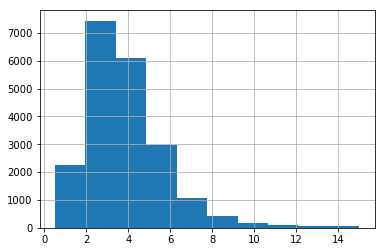

In [8]:
housing['median_income'].hist()

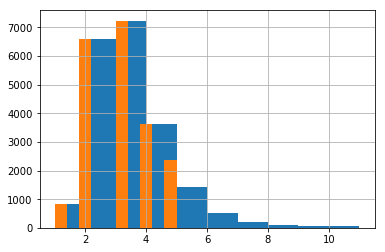

In [9]:
# median_income을 unit 단위로 1.5를 사용하여 grouping한다.
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5) # 1.5로 나누고 반올림 수행
housing['income_cat'].hist() # blue

# median_income이 단위 5 이상인 경우 데이터분포가 disperse되어 있으므로 이를 5로 통합한다.
housing['income_cat'].where(housing['income_cat'] < 5,5.0,inplace=True)
housing['income_cat'].hist() # carrot

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


## sklearn > StratifiedShuffleSplit
- 'income_cat' 속성을 기준으로 training, test dataset이 동일한 비율을 갖도록 전체 데이터셋을 분리한다.
- sklearn 라이브러리는 이 과정을 위한 함수를 제공한다.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

# 앞선 무작위 방식인 holdout과는 다르게 inome_cat 속성을 기준으로 동일한 비율로 데이터셋을 분리하였음.
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
# 전체 데이터셋의 비율 based on 'income_cat'
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [13]:
# traning dataset의 비율 based on 'income_cat'
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [14]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

위와 같이 scikit-learn > StratifiedShuffleSplit을 통해 'income_cat' 속성 비율에 따라 데이터셋을 분리하여 <br/>
Samping bias 문제를 해결함으로써 표본이 전체 모집단의 특징을 대표할 수 있도록 한다.

## Data Visualization
- 데이터를 시각화는 데이터 분석에 중요한 부분중에 하나이다. 데이터 시각화는 데이터의 특징을 보다 잘 이해할 수 있게 하고 분석과정에 있어 insight를 제공해 주기도 한다.
- 데이터의 특징을 한눈에 파악할 수 있다.
- matplotlib

In [15]:
for set in (strat_train_set,strat_test_set):
    set.drop(['income_cat'],axis=1,inplace=True)

### Data Visualization 1 : 위도와 경도를 축으로 하여 데이터의 지리학적 분포 파악

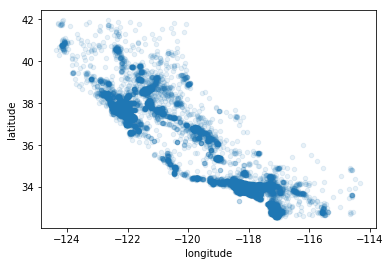

In [16]:
housing = strat_train_set.copy()
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

### Data Visualization 2 : 지리학적 위치에 따른 인구수와 집값 시각화
- 반지름 : 인구수(population)
- 색깔 : 집값(median_house_value)

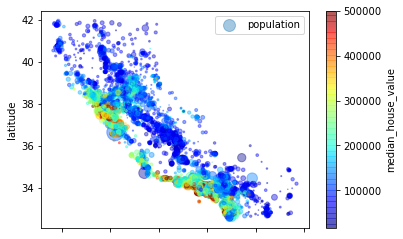

In [17]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,label='population',c='median_house_value',
            cmap=plt.get_cmap('jet'),colorbar=True)

### Feature Correlation( Pearson 상관계수 )
correlation은 각 feature와 class label간의 상관관계를 의미한다.<br/>
그 중에서도 linear correlation은 X1,X2 간 아래와 같은 선형관계가 존재한다.
- X1이 증가하면 X2도 증가하는 positive correlation
- X1이 감소하면 X2가 증가하는 negative correlation
- 아래 데이터셋에서는 correlation을 나타내는 지표로써 standard correlation coefficient(Pearson 상관계수)를 사용한다.
[-1,1] 의 범위를 지니는 값으로 1에 가까울 수록 양의 상관관계를, -1에 가까울수록 음의 상관관계를 나타내며
값이 0인 경우엔 linear correlation이 존재하지 않음을 의미한다.


In [18]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688252
total_rooms           0.135174
housing_median_age    0.105735
households            0.066782
total_bedrooms        0.049959
population           -0.025331
longitude            -0.049899
latitude             -0.143214
Name: median_house_value, dtype: float64

위 지표를 통해서 class label인 'median_house_value'와 'median_income'이 strong positive correlation 관계가 있음을 확인 할 수 있다.

### Data Visualization 3 : 각 feature간 linear coeffieicnet

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005864C66518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000005865422E80>]], dtype=object)

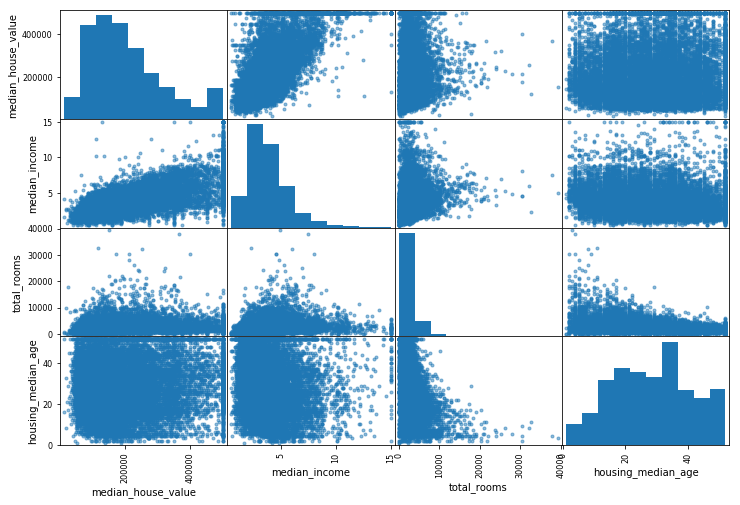

In [19]:
from pandas.tools.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

위 Data Visualization에서도 'median_house_value'(class label)과 'median_income' 간에 positive correlation이 존재함을 알 수 있다.
### Data Visualization 4 : Foucs on 'median_house_value' versus. 'median_income'

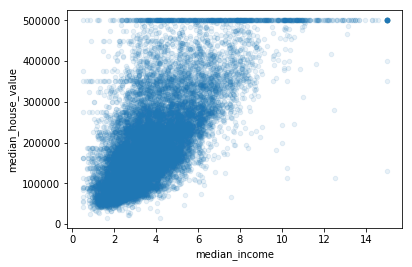

In [20]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

위 시각화를 통해 strong positive correlation 관계를 확인 할 수 있으며, outlier의 존재또한 알 수 있다.<br/>
outlier는 Machine learing 알고리즘 적용 시에 Model의 Accuracy를 떨어뜨리는 주요 요인이므로 데이터 전처리(Data Preprocessing) 과정에서 outlier를 제거하면 Model의 accuracy를 향상시킬 수 있다.

## Attribute Combination
앞선 correlation 분석에서 'median_income' 속성외의 나머지 속성들은 class label('median_house_value')와 strong correlation 관계를 보이지 못했다. 그러나, 이러한 속성들을 조합(Combination)하면 class label과 strong correlation 관계를 갖는 유의미한 속성을 만들 수 있다.</br>

위 데이터셋에서는 다음과 같은 새로운 속성(feature)를 만들 수 있다.
1. 가구당 방의 수 : 'total_rooms'와 'househodls' 의 조합
2. 방수 당 침실 수 : 'total_bedrooms'와 'total_rooms'의 조합
3. 가구당 인구수 : 'population'과 'households'의 조합

In [21]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688252
rooms_per_household         0.154516
total_rooms                 0.135174
housing_median_age          0.105735
households                  0.066782
total_bedrooms              0.049959
population                 -0.025331
population_per_household   -0.026039
longitude                  -0.049899
latitude                   -0.143214
bedrooms_per_rooms         -0.256561
Name: median_house_value, dtype: float64

위 Attribute Combination을 통해 기존의 속성보다 more strong correlation을 발견했다.
- rooms_per_household 와 median_house_value 간의 positive correlation
- bedrooms_per_rooms 와 median_house_value 간의 negative correlation

## Data Preprocessing

### Missing Data 처리
1. Missing Data가 존재하는 모든 tuple 삭제
2. Missing Data가 존재하는 모든 column 삭제
3. Missing Data를 통계학적 방법(median,mean) 또는 prediction(regression 등 ML model사용) 으로 채우는 방법

### Categorical Data 처리
- One_Hot_Encoding

### Data Transformation
- Normalization
- Standardization


In [22]:
# Missing Data 처리

housing.dropna(subset=['total_bedrooms']) # option 1
housing.drop('total_bedrooms',axis=1) # option 2
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median) # option 3

2569      423.0
9071      309.0
4729      300.0
8696      343.0
17643     685.0
17202     435.0
10000     275.0
6438       80.0
12905     518.0
724       428.0
14803    1157.0
19507     237.0
7648      249.0
19154    1001.0
8278     1301.0
1118      137.0
5021      387.0
6522      783.0
6008      247.0
14557     988.0
9581      477.0
11017     339.0
12482    1220.0
19514     508.0
17024    3020.0
12727     328.0
3737      911.0
5594      230.0
871      2861.0
7335      374.0
          ...  
5777      525.0
7635      893.0
19161    1336.0
2112      216.0
8722      279.0
15350     275.0
627       554.0
5045      369.0
5942      322.0
10425     280.0
13265     341.0
17088    1943.0
3984      373.0
4875      809.0
12575     288.0
7512      320.0
9949      273.0
3176      265.0
5014      693.0
583       368.0
7898      938.0
13621     641.0
10944     365.0
18232    1599.0
8819      501.0
19689     328.0
11327     366.0
10757     455.0
10884      71.0
20533    1019.0
Name: total_bedrooms, dt

### Missing Data 
- sklearn > Imputer : Missing Data 처리에 대한 함수 제공

In [23]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num) # housing_num에 대한 median 값을 계산
X = imputer.transform(housing_num) # imputer.transform은 numpy.ndarray 타입을 리턴함.

In [24]:
imputer.statistics_

array([ -1.18490000e+02,   3.42600000e+01,   2.90000000e+01,
         2.12700000e+03,   4.35000000e+02,   1.16600000e+03,
         4.09000000e+02,   3.52940000e+00,   1.80000000e+05,
         5.23066959e+00,   2.03273003e-01,   2.81354850e+00])

In [25]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household
0,-124.14,40.78,35.0,2426.0,423.0,982.0,432.0,3.4219,92800.0,5.615741,0.174361,2.273148
1,-118.15,34.71,35.0,1503.0,309.0,842.0,300.0,2.5278,97700.0,5.010000,0.205589,2.806667
2,-118.36,34.05,47.0,1424.0,300.0,632.0,278.0,4.0625,295200.0,5.122302,0.210674,2.273381
3,-118.34,33.86,35.0,1936.0,343.0,1008.0,346.0,5.4791,285900.0,5.595376,0.177169,2.913295
4,-121.90,37.27,28.0,4538.0,685.0,1996.0,667.0,5.4609,263600.0,6.803598,0.150948,2.992504


In [26]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 12 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16512 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
median_house_value          16512 non-null float64
rooms_per_household         16512 non-null float64
bedrooms_per_rooms          16512 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(12)
memory usage: 1.5 MB


sklearn > Imputer를 통해 dataset에 존재했던 Missing Data를 column의 median 값으로 채웠다.

### Categorical Data Handling
Machine Learning Model 알고리즘 적용을 위해서 원본 dataset에 존재하는 'ocean_proximity' 속성값이 text type으로 되어 있는 categorical data를 one_hot_encoding 한다.

- Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity'] # pd.Series
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([4, 1, 0, ..., 0, 0, 1], dtype=int64)

In [28]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


Label Encoder는 categorical data 값을 Integer Scalar 값으로 표현한다. 위 방식은 categorical data가 순서의 의미가 있는 Ordinal Data인 경우 주로 사용된다.( ex. (날씨) 비 - 흐림 - 맑음 )<br/>
위 데이터셋의 'ocean_proximity'는 Ordinal type이 아니므로 아래와 같은 One_hot_encoding 방식을 사용할 수 있다.

- One_hot_encoding

In [29]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [30]:
housing_cat_1hot.toarray()

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

위 과정을 통해 Categorical Data를 ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN'] 순으로 OneHotEncoding 하였다.<br/>
OneHotEncoding 된 데이터는 sparse matrix로 대부분의 value가 0인 matrix이므로 memory 공간을 상당히 소비하므로 housing_cat_1hot.toarray() 함수를 호출하기 전까지는 메모리에 matrix가 assign 되지 않는다.

- 위 OneHotEncoding 과정을 간편화( One-Shot)

In [31]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True) # 리턴되는 matrix를 sparse matrix로하여 메모리 공간 절약
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int32'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Custom Transformers
- Attribute Combination<br/>

앞서 수행했던 Attribute Combination 과정에 대한 transformer를 class로 구현하여 실제 문제를 해결하고자 하는 Application에 Modurarity를 더한다.

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix,bedrooms_ix,population_ix,household_ix = housing.columns.get_loc('total_rooms'),housing.columns.get_loc('total_bedrooms')\
,housing.columns.get_loc('population'),housing.columns.get_loc('households')

In [33]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        '''
        X : numpy.ndarray
        '''
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
# numpy.c_ : 2 dimension np.ndarray에 columns 축에 1 dimension np.ndarray concatnation

In [34]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing_tr.values)

In [35]:
housing_extra_attribs

array([[-124.14      ,   40.78      ,   35.        , ...,    5.61574074,
           2.27314815,    0.17436109],
       [-118.15      ,   34.71      ,   35.        , ...,    5.01      ,
           2.80666667,    0.20558882],
       [-118.36      ,   34.05      ,   47.        , ...,    5.12230216,
           2.27338129,    0.21067416],
       ..., 
       [-117.87      ,   33.64      ,   26.        , ...,    7.80709534,
           2.96230599,    0.12922465],
       [-117.9       ,   33.71      ,   15.        , ...,    8.16666667,
           4.34848485,    0.13172542],
       [-121.67      ,   38.54      ,   13.        , ...,    6.35056877,
           2.6401241 ,    0.16593389]])

## Feature Scaling( Data Transformation )
Feature Scaling이 필요한 이유는?<br/>
Machine learing 알고리즘은 각 데이터 tuple간의 similarity를 계산하는 경우가 존재한다.<br/>
similarity(유사도)는 distance,cosine,jaccard coefficient 등 여러 방법이 존재하나 Numeric data type에 대한 측정지표인 distance의 경우
minkowski distance로 일반화하여 나타낼 수 있는데, 이떄의 distance값이 각 feature별로 큰 차이를 보인다면 특정한 feature가 전체 distance 값을 결정지을 수 있게되어 데이터 분석 품질이 악화된다. 따라서, 이러한 경우에 Numeric type인 속성들에 대해서 동일한 데이터 범위를 갖게 하는 전처리과정이 요구되는데 이를  Feature Scaling 혹은 Data Transformation이라 하고 대표적인 예로 Normalization, Standardization이 존재한다.

1. Normalization<br/>
Normalization은 z = x-min/max 로 나타낼 수 있고 데이터는 [0,1] 범위값을 갖게 된다. Normalization을 하게 되면 각 feature들이 distance에 영향을 미치는 정도가 unitform하므로 feature value간 scaling차이에 따른 오차를 해결할 수 있다. 다만, Normalization은 데이터값에 최솟값을 빼고 최댓값으로 나누는 연산을 수행하므로, 최소 혹은 최대의 값을 가진 outlier가 존재하는 경우 normalized되는 값이 크게 영향을 받는다.( Outlier에 민감함)<br/>
<br/>
2. Standardization<br/>
Standardization은 z = x-m/variance로 데이터의 분포를 정규분포로 바꾼다. Standardization은 Normalization과 다르게 Outlier에 민감하지 않은 장점이 있다.(Robustness)

## Transformation Pipelines
- 앞서 구현한 Missing Data, Attribute Combination, Freature Scailing에 대한 transform과정을 pipeline으로 한데 묶어 transformer를 구현한다.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

- Numeric type Feature와 Categorical type Feature간의 Concatnation(FeatureUnion)

In [37]:
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator,TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.attribute_names].values
    
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing_num = housing.drop('ocean_proximity',axis=1)
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scalar',StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer',LabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])

In [38]:
housing = strat_train_set.copy()

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

## Model Selection
- LinearRegression
- DecisionTreeRegressor
- RandomForestRegressor

## Error rate
- MSE : Mean Squared Error
- MAE : Mean Absolute Error
- RMSE : Root Mean Squared Error

## LinearRegression

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67396.654028652571

In [41]:
strat_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.00000,16348.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564549,35.630708,28.606286,2624.78022,535.374113,1417.650073,497.513505,3.865989,206591.396439
std,2.004803,2.135556,12.555331,2150.96559,413.627058,1096.292974,375.358800,1.887378,114904.161580
min,-124.350000,32.540000,1.000000,2.00000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1446.00000,296.000000,786.000000,280.000000,2.562500,119200.000000
50%,-118.490000,34.260000,29.000000,2127.00000,435.000000,1166.000000,409.000000,3.529400,180000.000000
75%,-118.000000,37.710000,37.000000,3142.00000,646.000000,1721.250000,603.000000,4.748350,265300.000000
max,-114.310000,41.950000,52.000000,39320.00000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


원본 dataset의 median_house_value(class label)의 분포를 살펴보면 quartile(25%~75%)의 범위가 \$120,000 ~ $265,000 임을 알 수 있다.<br/>
따라서, 앞선 Model에서 구한 RMSE : 68224는 실 Application에 적용하기에 다소 무리가 있는 error를 보인다.

## DecisionTreeRegressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

DecisionTreeRegressor를 사용한 RMSE가 0.0이 측정되었지만 위 모델은 문제해결을 위한 모델로써 적합하지 않다.<br/>
위에서 사용한 test dataset은 training dataset과 중첩된 것으로써 Unknown data에 대한 General Error rate를 표현하기에 적합하지 않다.<br/>
즉, 모델이 strongly overfitting 되었다.

## k-fold Cross Validation
앞서 모델의 accuracy를 측정하기 위한 방법으로써 holdout을 살펴 보았다. k-fold Cross Validation는 holdout과 같이 Machine Learning Model의 accuracy를 측정하기 위한 방법중의 하나이다.<br/>
k-fold Cross Validation은 원본 dataset을 k개의 dataset(D1,D2,D3,...,Dk)로 나눈뒤에 각 Di를 test dataset으로, Di를 제외한 Dj의 집합을 training dataset으로 하여 k회 Model의 accuracy를 측정하여 평균 accuracy를 측정하는 방법이다.<br/>
위 방법에서는 각 데이터 tuple이 한번씩 test data로 사용되며 holdout방법보다 정확하게 accuracy를 측정한다고 알려져 있다.<br/>
먼저 사용했었던 StratifiedShuffle도 k-fold Cross Validation의 일종으로써, 위에서 나눈 Di와 Dj 간의 class label의 비율을 동일하게 하여 Sampling bias 문제를 해결하는 방법이다.

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [44]:
def display_scores(scores):
    print('Scores :',scores)
    print('Mean :',scores.mean())
    print('Standard deviation :',scores.std())

In [45]:
display_scores(tree_rmse_scores)

Scores : [ 70974.36270188  68914.67866236  69629.52433694  70280.28851601
  66435.22191306  69081.51280861  67716.71716024  70434.74132747
  68674.22397321  70693.91478622]
Mean : 69283.5186186
Standard deviation : 1356.5583339


k-fold Cross Validation을 사용해 traing dataset, test dataset을 분리하여 DecisionTreeRegressor Model의 RMSE를 측정한 지표이다.

In [46]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores : [ 68962.77417108  66279.93688268  66346.20812908  66163.70253204
  65926.89616094  70893.41286662  65573.52488706  68305.64975597
  70373.39582739  68145.3582617 ]
Mean : 67697.0859475
Standard deviation : 1827.01766581


두 Model간의 결과를 비교하면 LinearRegression이 DecisionTreeRegressor 보다 좋은 성능을 보였다.<br/>
DecisionTreeRegressor는 strongly overfitting 되었다고 판단할 수 있다.

## RandomForest( Ensemble )
RandomForest는 Machine Learning의 Ensemble 방법의 일종으로써 하나의 원본 dataset에 대해서 multiple한 Model을 training하고 test data에 대해 각 모델이 prediction한 결과를 voting하여 최종적으로 data의 class label을 예측하는 방법이다.<br/>
RandomForest는 이러한 Ensemble 방법중에서도 Model을 DecisionTree을 사용한다.<br/>

### hyperparameter
- The number of DecisionTree
- The number of AttributesSelect

### attribute selection
- ID3 : information gain
- C4.5 : gain ratio
- CART : gini index
<br/><br/>
more information : https://github.com/HyunSu-Jin/DecisionTree.git

In [47]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [48]:
display_scores(forest_rmse_scores)

Scores : [ 54062.16827685  50251.08033124  52287.48478503  51407.51883214
  49575.45360608  52121.47550355  50554.62942254  52425.70969707
  53487.05697855  51989.17677592]
Mean : 51816.1754209
Standard deviation : 1333.49115682


RandomForestRegressor Model이 앞서 사용했던 모델들 중에 가장 좋은 성능을 보임을 알 수 있다. ( ensemble )

## Fine-Tune Model ( Validation )
앞서 RandomForestRegressor은 hyperparameter로 decisiontree의 개수나 overfitting을 막기위한 regularization 방법으로 attribute selection과정에서 사용될때 사용되는 attribute의 수가 존재한다. 그 외의 모델들도 hyperparameter를 지니는데, hyperparameter의 일반적인 의미는 training과정에서는 변경될 수 없고 모델 setting단계에서 지정해주는 변수를 의미한다. Artificial Neural Network의 경우 hyperparameter로 learning_rate이나 regularization strength가 있다.
<br/>
<br/>
이러한 hyperparamter의 값은 Model의 accuracy에 영향을 미치므로 Model Selection과정에서 최적의 accuracy를 보이는 optimal한 hyperparameter를 선택해야 하는 필요성이 존재한다. 이러한 optimal hyperparameter를 구하는 과정이 'Validation'이며 이 때 사용되는 dataset이 validation dataset이다. validation dataset은 traing dataset과 test dataset간 데이터가 중첩되지 않는 것처럼 마찬가지로 각 dataset간 mutually exclusive하다. 

### sklearn > Grid Search
sklearn에서는 이러한 validation과정을 위해 Grid Search 라이브러리를 제공하고 이를 통해 Best(Optimal) hyperparameter를 얻을 수 있다.

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators' : [3,10,30],'max_features' : [2,4,6,8]},
    {'bootstrap' : [False],'n_estimators' : [3,10],'max_features':[2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'bootstrap': [False], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

위 Grid Search과정은 python.dict 기준으로 3x4 + 2x3 = 18개의 조합에 대해서 MSE를 계산한다.

In [50]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

Validation 결과 n_estimators(모델의 수) : 30, max_features(attribute selection이 선택되는 feature수) : 6 이 가장 낮은 MSE를 보였다.

In [51]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
cvres = grid_search.cv_results_
for mean_scores,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_scores),params)

62928.113298 {'n_estimators': 3, 'max_features': 2}
54402.5584322 {'n_estimators': 10, 'max_features': 2}
51786.2068596 {'n_estimators': 30, 'max_features': 2}
60167.911547 {'n_estimators': 3, 'max_features': 4}
51800.6271222 {'n_estimators': 10, 'max_features': 4}
49628.0557554 {'n_estimators': 30, 'max_features': 4}
57680.2895849 {'n_estimators': 3, 'max_features': 6}
51029.9273804 {'n_estimators': 10, 'max_features': 6}
48917.8053034 {'n_estimators': 30, 'max_features': 6}
58472.2084897 {'n_estimators': 3, 'max_features': 8}
51525.2603251 {'n_estimators': 10, 'max_features': 8}
49406.2248722 {'n_estimators': 30, 'max_features': 8}
61300.1073995 {'n_estimators': 3, 'bootstrap': False, 'max_features': 2}
53658.2723454 {'n_estimators': 10, 'bootstrap': False, 'max_features': 2}
58209.1328078 {'n_estimators': 3, 'bootstrap': False, 'max_features': 3}
51813.3975303 {'n_estimators': 10, 'bootstrap': False, 'max_features': 3}
56852.0057333 {'n_estimators': 3, 'bootstrap': False, 'max_featu

RandomForestRegressor(Ensemble)과 Validation과정을 거쳐 RMSE : 49505 로 앞서 구했던 Model 중 가장 우수한 성능을 보인다.

In [55]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis=1)
Y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

52415.73806894663

최종적으로 얻은 Model의 RMSE가 52415로써 Validation 과정보다 낮은 성능을 보였는데, 그 이유는 Model이 overfitting되었기 때문이다.

## Additional : Feature Importance(weight)
각 feature가 class label에 얼마나 영향을 주는지 판단하는 지표

In [56]:
feature_importances = final_model.feature_importances_
feature_importances

array([  7.19202154e-02,   6.67138035e-02,   4.41210691e-02,
         1.73928812e-02,   1.63467336e-02,   1.80307990e-02,
         1.60376341e-02,   3.25900690e-01,   6.41297030e-02,
         1.03172512e-01,   7.20570269e-02,   9.81037339e-03,
         1.63596755e-01,   8.34299353e-05,   3.61430687e-03,
         7.07206671e-03])

In [58]:
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.32590069029586466, 'median_income'),
 (0.16359675533553925, 'INLAND'),
 (0.10317251174323187, 'pop_per_hhold'),
 (0.072057026911350242, 'bedrooms_per_room'),
 (0.071920215443732741, 'longitude'),
 (0.066713803457144547, 'latitude'),
 (0.06412970297832167, 'rooms_per_hhold'),
 (0.044121069073677875, 'housing_median_age'),
 (0.018030798989548558, 'population'),
 (0.017392881220158449, 'total_rooms'),
 (0.01634673358413229, 'total_bedrooms'),
 (0.016037634058731851, 'households'),
 (0.0098103733855622408, '<1H OCEAN'),
 (0.0070720667134558128, 'NEAR OCEAN'),
 (0.0036143068742641601, 'NEAR BAY'),
 (8.3429935283765437e-05, 'ISLAND')]

최종적으로 'median_house_value'(class label)을 결정하는데는 'median_income' 가 제일 큰 비중을 차지하고 ocean_proximity feature 중 INLAND값이 True or False 이냐가 두번째로 큰 비중을 차지하고 있음을 알 수 있다.